In [110]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LOAD DATASET

In [111]:
### LOAD DATASET

df=pd.read_csv("/content/drive/MyDrive/diamonds.csv")

In [112]:
### CHECK DATASET

print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


DATA PREPROCESSING

In [113]:
### DATA TYPES AND NULL CHECK

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [114]:
### DATASET SHAPE

df.shape

(53940, 10)

In [115]:
### NUMERIC SUMMARY

print(df.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


DATA CLEANING

In [116]:
### CHECK MISSING VALUE

print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [117]:
### CHECK FOR ZERO OR INVALID VALUES IN X,Y,Z

print((df[['x','y','z']]==0).sum())

x     8
y     7
z    20
dtype: int64


In [118]:
### REPLACE ZERO VALUES WITH NAN

df[['x','y','z']]=df[['x','y','z']].replace(0,np.nan)

In [119]:
### FILL NAN VALUES WITH MEDIAN

df[['x','y','z']]=df[['x','y','z']].fillna(df[['x','y','z']].median())

In [120]:
print('before',df.duplicated().sum())
df=df.drop_duplicates()
print('after',df.duplicated().sum())

before 146
after 0


 FEATURE ENGINEERING ---> DERIVE NEW COLUMNS

In [121]:
### PRICE INDIAN RUPEES FEATURE
df['price_inr']=df['price']*88.23

### VOLUME FEATURE
df['volume']=df['x']*df['y']*df['z']

### PRICE PER CARAT FEATURE
df['price_per_carat']=df['price']/df['carat']

### DIMENSION RATIO FEATURE
df['dimension_ratio']=(df['x']+df['y'])/(2*df['z'])

### CARAT CATEGORY FEATURE
def carat_category(carat):
    if carat<0.5:
        return 'light'
    elif carat<=1.5:
        return 'medium'
    elif carat>1.5:
        return 'heavy'
df['carat_category']=df['carat'].apply(carat_category)

In [122]:
print(df)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       price_inr      volume  price_per

HANDLE OUTLIERS

BEFORE OUTLIERS

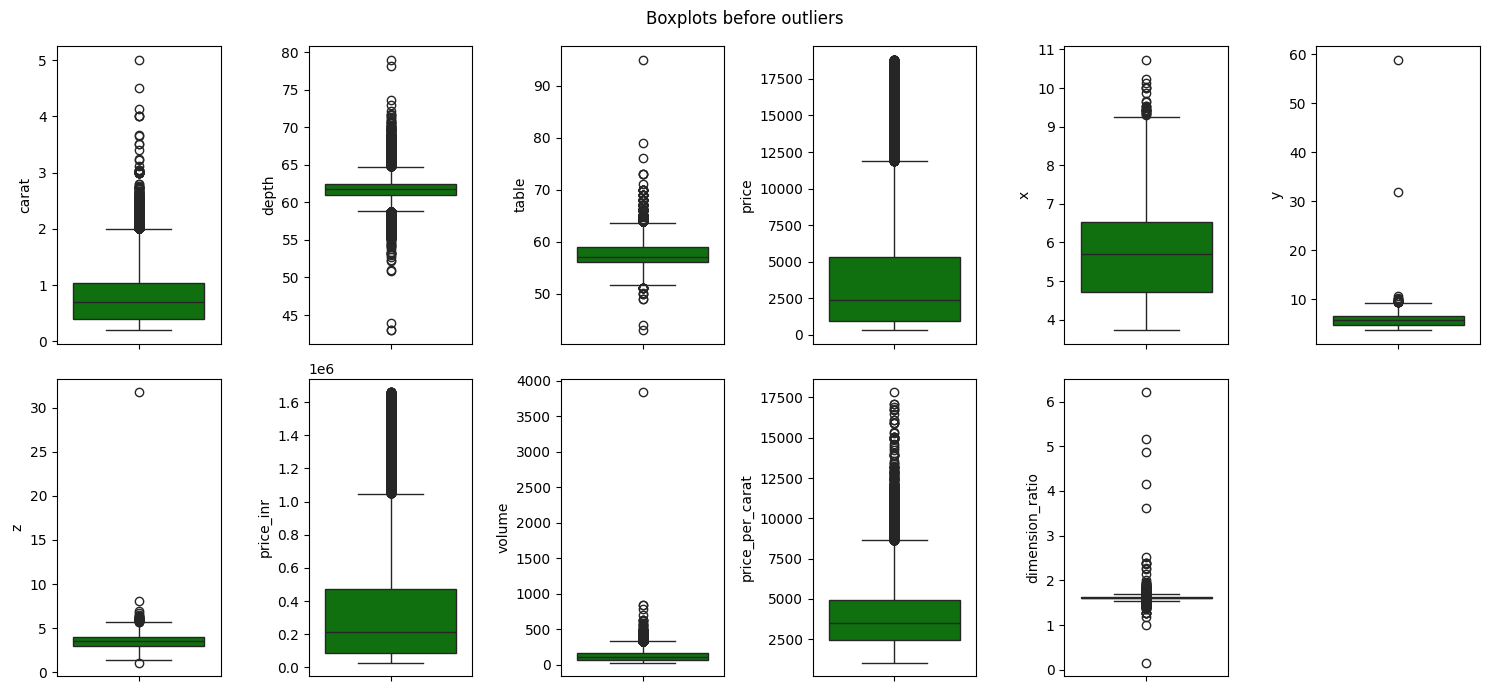

In [123]:
numerical_cols =df.select_dtypes(include=['int64','float64']).columns

### BOX PLOT FOR NUMERIC COLUMNS
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before outliers")
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='green')
    plt.tight_layout()


In [126]:
# IQR METHOD

numerical_cols =df.select_dtypes(include=['int64','float64']).columns

Q1=df[numerical_cols].quantile(0.25)
Q3=df[numerical_cols].quantile(0.75)
IQR=Q3-Q1

df_cap=df.copy()
for col in numerical_cols:
    lower=Q1[col]-1.5*IQR[col]
    upper=Q3[col]+1.5*IQR[col]
    df_cap[col]=df_cap[col].clip(lower,upper)

AFTER OUTLIER

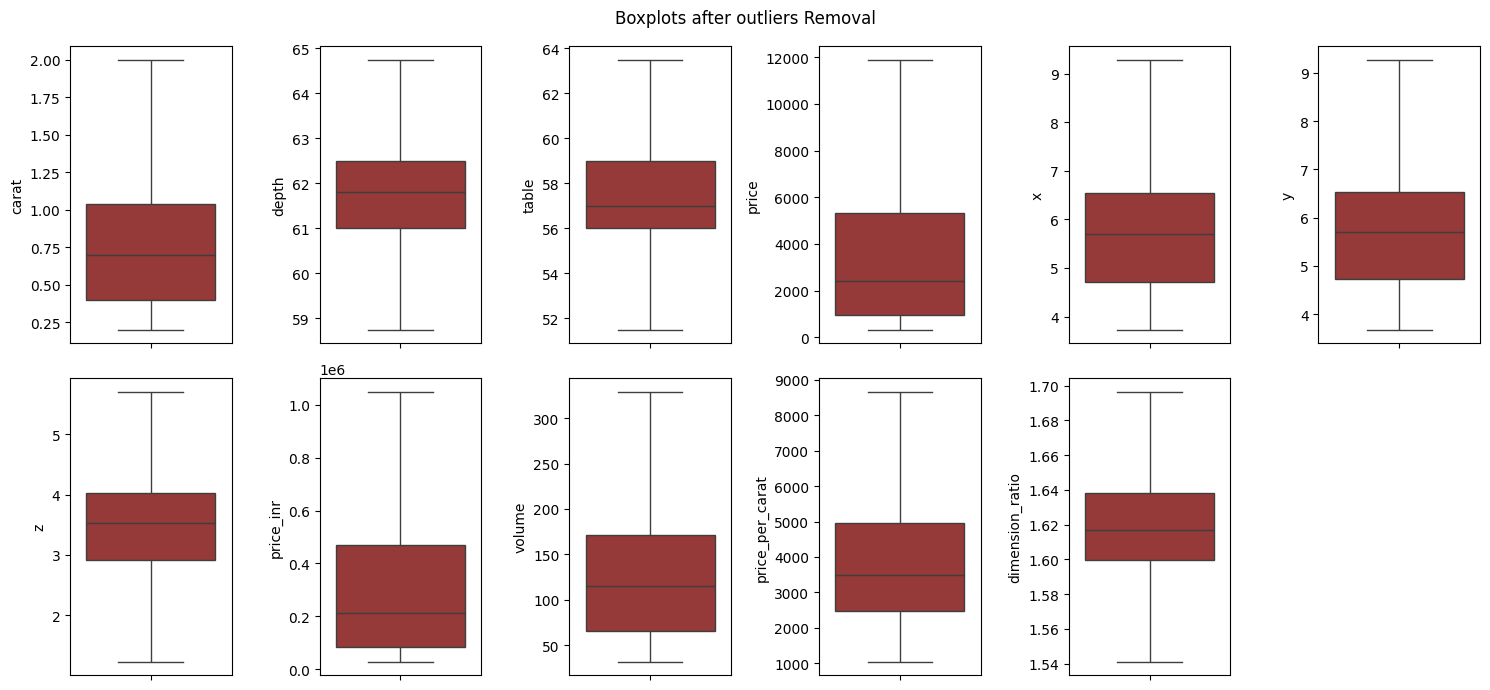

In [127]:
numerical_cols =df_cap.select_dtypes(include=['int64','float64']).columns

### BOX PLOT FOR NUMERIC COLUMNS
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after outliers Removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=df_cap[numerical_cols[i]],color='brown')
    plt.tight_layout()


HANDLING SKEWNESS

In [128]:
### CHECK SKEWNESS

numerical_cols = df_cap.select_dtypes(include=['int64','float64']).columns
skew_values = df_cap[numerical_cols].skew()
print(skew_values)

carat              0.899170
depth             -0.228563
table              0.472532
price              1.148606
x                  0.392713
y                  0.388437
z                  0.384730
price_inr          1.148606
volume             0.916261
price_per_carat    0.899873
dimension_ratio    0.265656
dtype: float64


In [129]:
### APPLY LOG TRANSFORMATION TO REDUCE SKEWNESS

df_cap['price']=np.log1p(df_cap['price'])
df_cap['carat']=np.log1p(df_cap['carat'])
df_cap['volume']=np.log1p(df_cap['volume'])
df_cap['price_inr']=np.log1p(df_cap['price_inr'])
df_cap['price_per_carat']=np.log1p(df_cap['price_per_carat'])

In [130]:
### CHECK SKEWNESS AGAIN

numerical_cols = df_cap.select_dtypes(include=['int64','float64']).columns
skew_values = df_cap[numerical_cols].skew()
print(skew_values)

carat              0.493974
depth             -0.228563
table              0.472532
price              0.030932
x                  0.392713
y                  0.388437
z                  0.384730
price_inr          0.030354
volume             0.072745
price_per_carat    0.092312
dimension_ratio    0.265656
dtype: float64


EDA--->EXPLORATORY DATA ANALYSIS

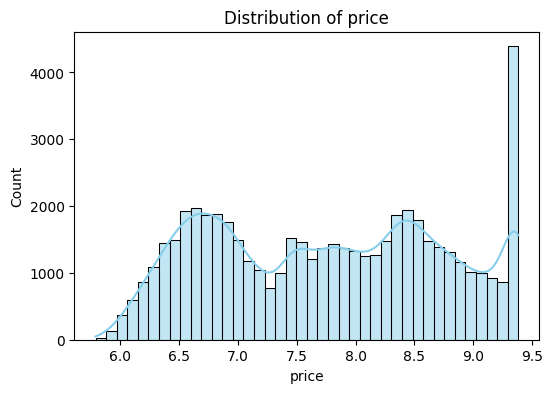

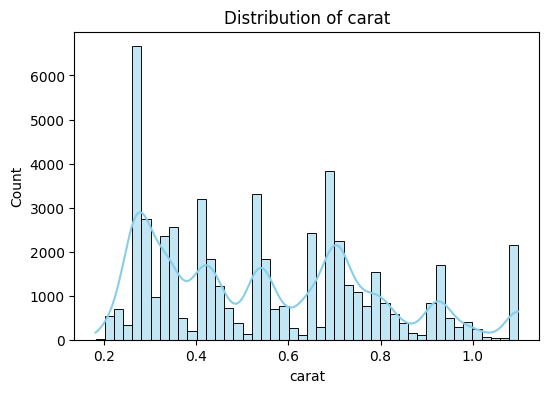

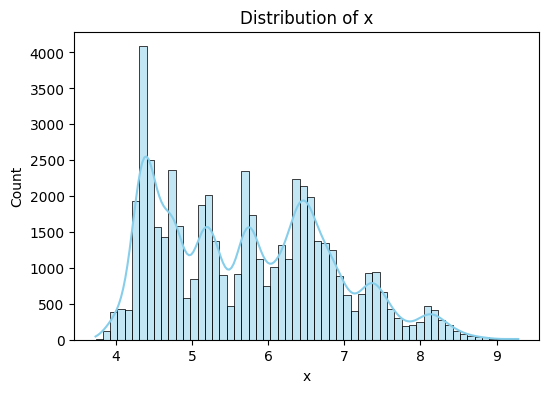

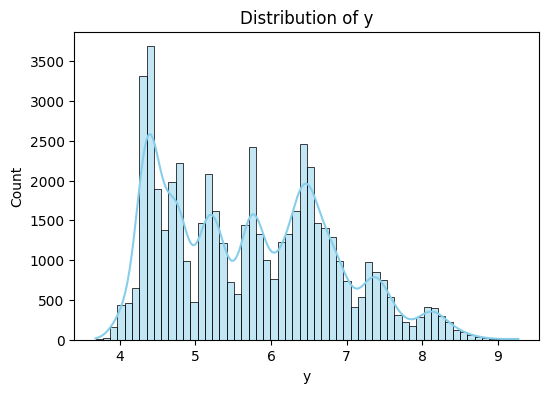

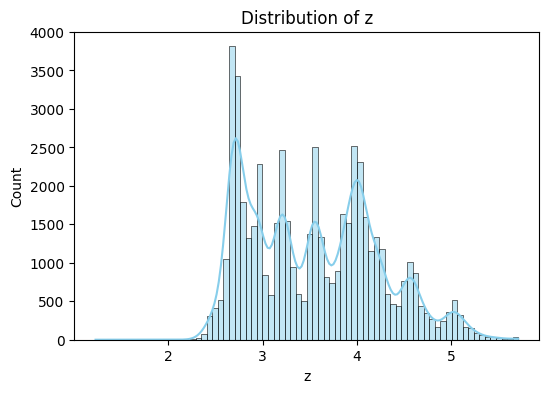

In [131]:
### DISTRIBUTION PLOTS

num_cols=['price','carat','x','y','z']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cap[col],kde=True,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

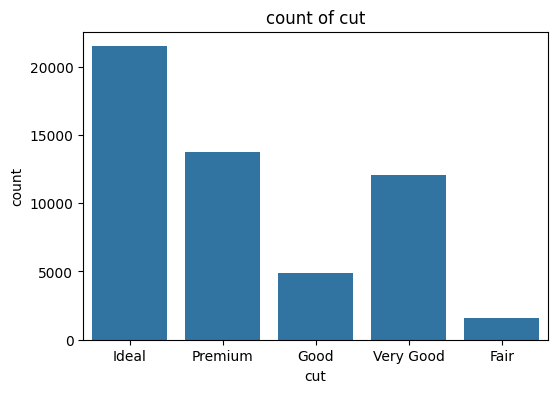

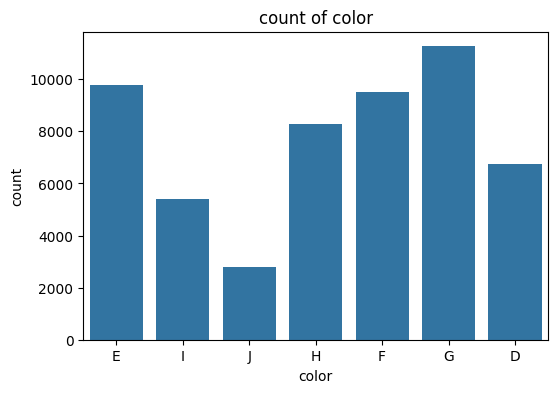

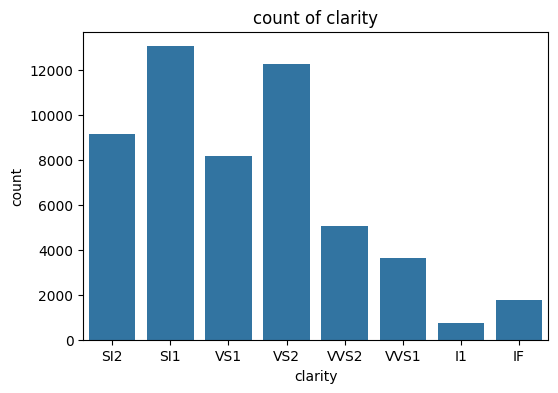

In [132]:
### COUNT PLOTS FOR CATEGORICAL FEATURES

categorical_cols=['cut','color','clarity']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_cap,x=col)
    plt.title(f'count of {col}')
    plt.show()

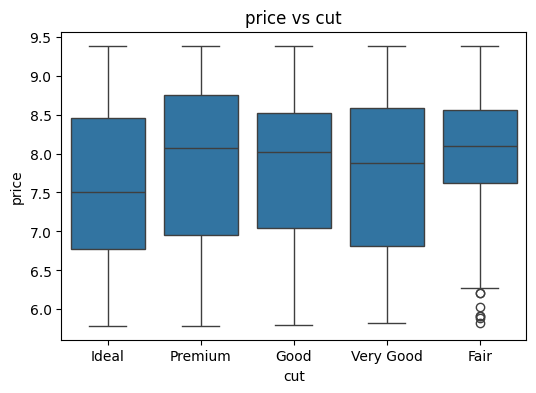

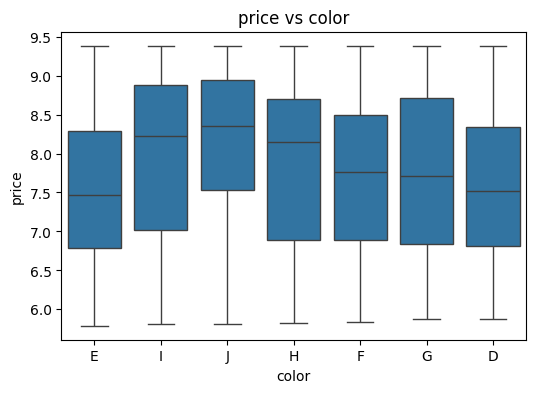

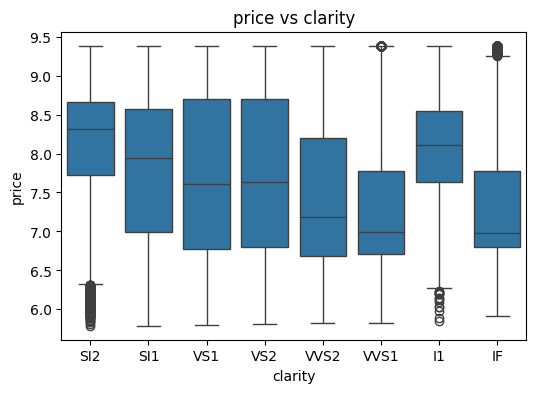

In [133]:
### BOX PLOT OF PRICE DISTRIBUTION FOR EACH CATEGORICAL FEATURES

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_cap,x=col,y='price')
    plt.title(f'price vs {col}')
    plt.show()

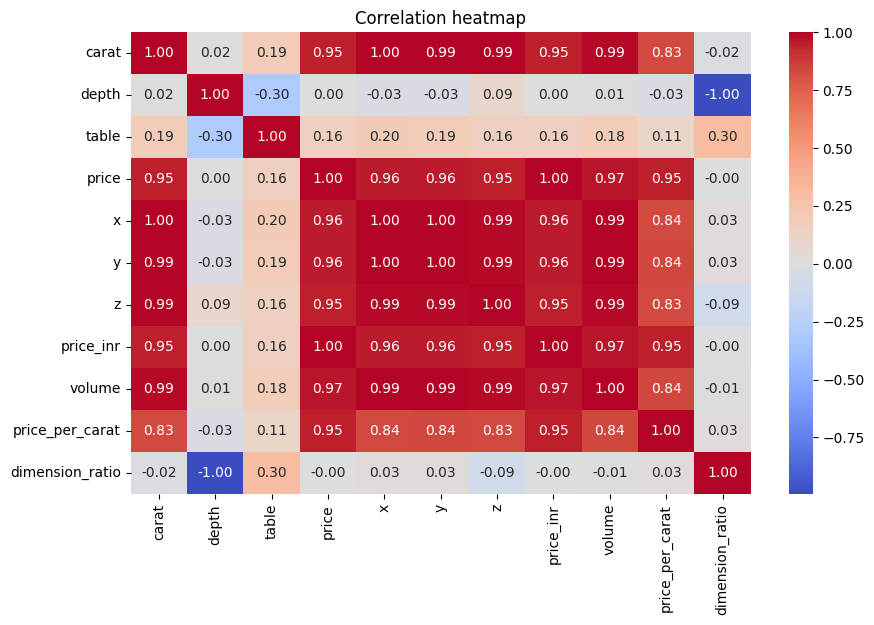

In [134]:
### CORRELATION HEATMAP OF CATEGORICAL FEATURES

numeric_cols=df_cap.select_dtypes(include="number")
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

<Figure size 1400x700 with 0 Axes>

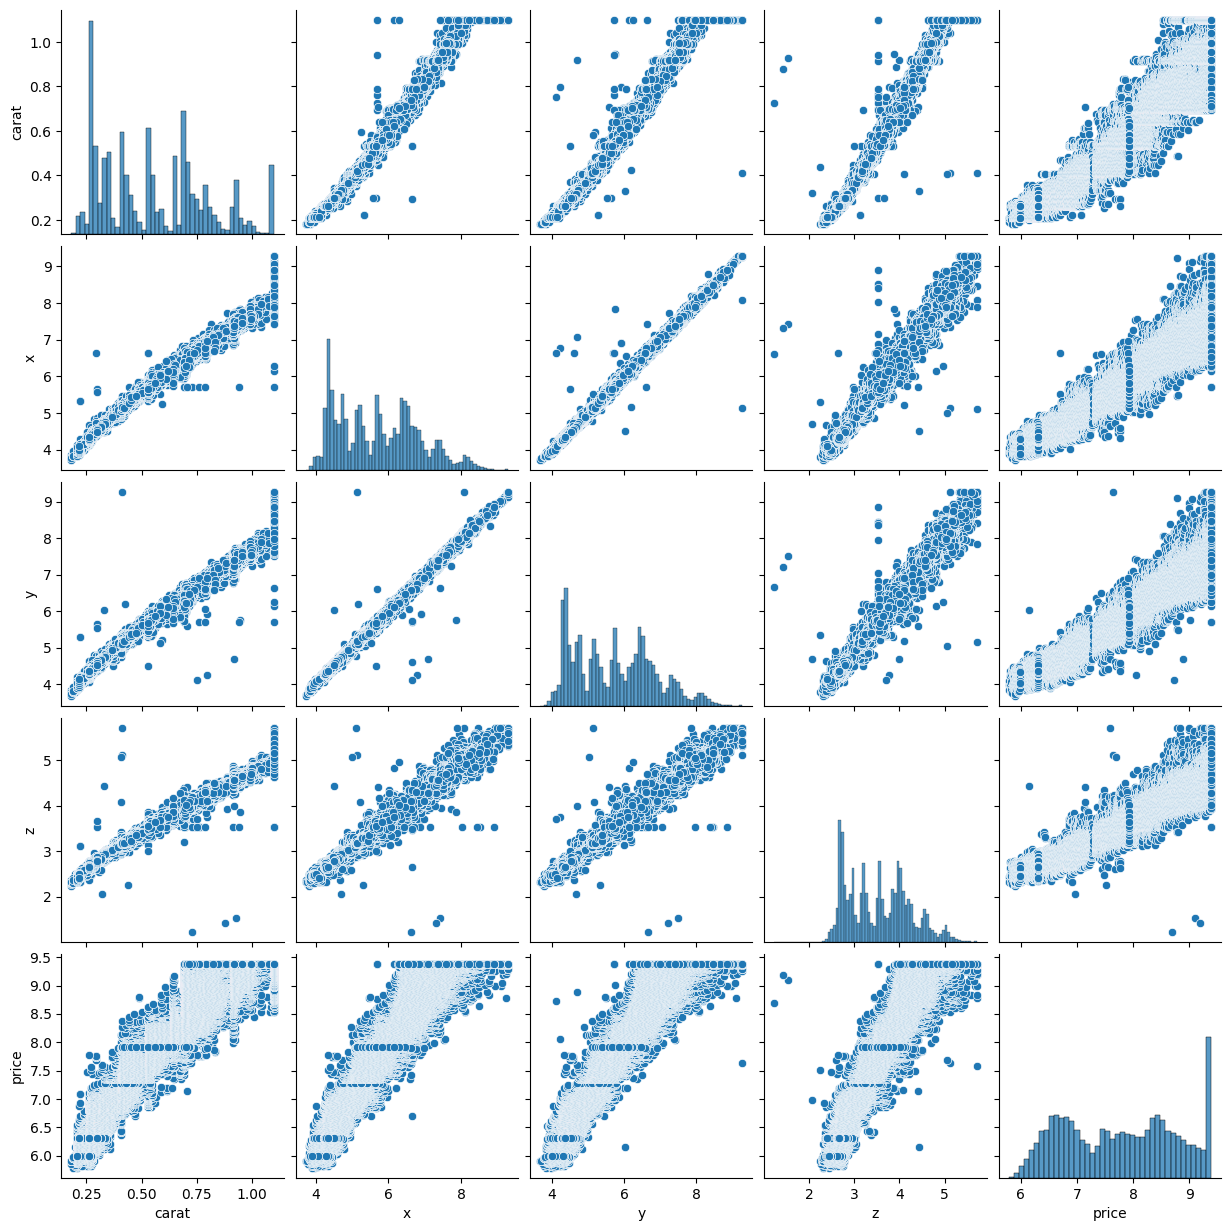

In [135]:
plt.figure(figsize=(14,7))
sns.pairplot(df_cap[['carat','x','y','z','price']])

Text(0, 0.5, 'Price')

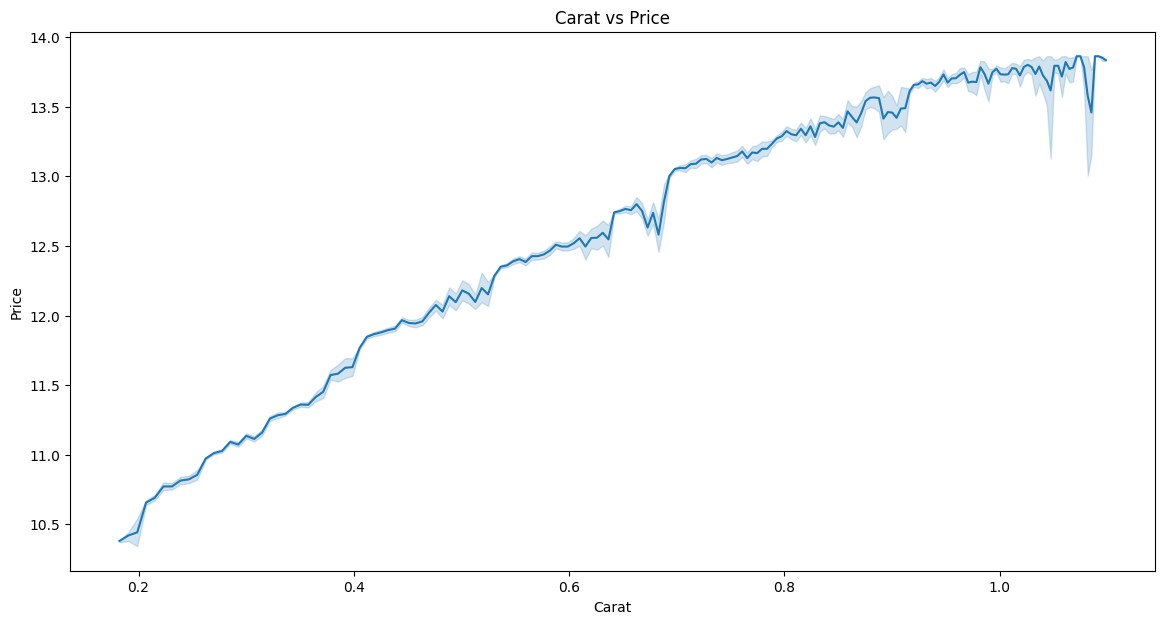

In [136]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_cap,x=df_cap['carat'],y=df_cap['price_inr'])
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")

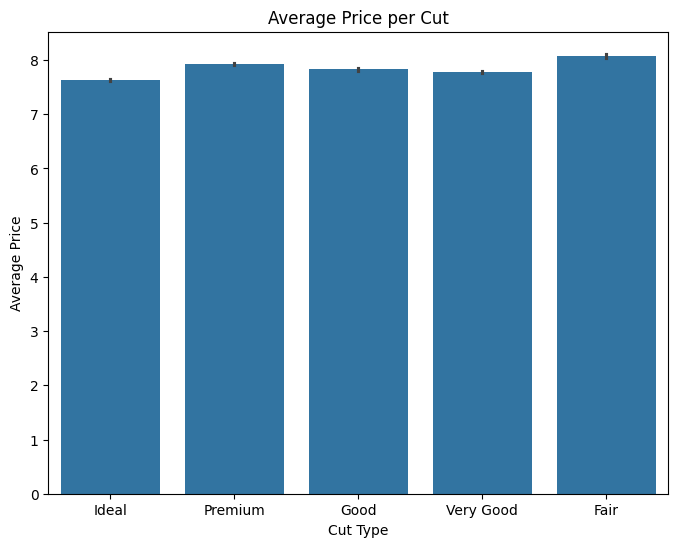

In [137]:
### BARPLOT

plt.figure(figsize=(8,6))
sns.barplot(x='cut', y='price', data=df_cap, estimator='mean')
plt.title("Average Price per Cut")
plt.xlabel("Cut Type")
plt.ylabel("Average Price")
plt.show()

In [138]:
print(df_cap.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'price_inr', 'volume', 'price_per_carat', 'dimension_ratio',
       'carat_category'],
      dtype='object')


In [139]:
### DROP COLUMNS

df_cap=df_cap.drop('price',axis=1)
print(df_cap.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price_inr', 'volume', 'price_per_carat', 'dimension_ratio',
       'carat_category'],
      dtype='object')


SPLIT DATA

In [140]:
### SPLITING DATA

X = df_cap.drop('price_inr', axis=1)
y = df_cap['price_inr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_test shape: (10759, 13)
y_test shape: (10759,)
X_train shape: (43035, 13)
y_train shape: (43035,)


ORDINAL ENCODING

In [141]:
### ORDINAL ENCODE FOR CATEGORICAL COLUMN

cut_order = ['Fair','Good','Very Good','Premium','Ideal']
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
carat_order = ['light','medium','heavy']

encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order, carat_order])

X_train[['cut', 'color', 'clarity', 'carat_category']] = encoder.fit_transform(X_train[['cut', 'color', 'clarity', 'carat_category']])
X_test[['cut', 'color', 'clarity', 'carat_category']] = encoder.transform(X_test[['cut', 'color', 'clarity', 'carat_category']])

In [142]:
### VIEW X-TRAIN
print(X_train)

          carat  cut  color  clarity  depth  table     x     y     z  \
33544  0.300105  4.0    6.0      3.0   62.0   55.0  4.47  4.53  2.79   
26752  1.098612  4.0    6.0      1.0   62.0   57.0  8.36  8.31  5.18   
45914  0.425268  4.0    5.0      3.0   60.0   57.0  5.24  5.30  3.16   
3071   0.587787  3.0    6.0      2.0   61.7   58.0  5.96  5.93  3.67   
43829  0.343590  4.0    5.0      6.0   61.5   56.0  4.81  4.82  2.96   
...         ...  ...    ...      ...    ...    ...   ...   ...   ...   
11311  0.693147  3.0    2.0      3.0   60.4   58.0  6.51  6.46  3.92   
44869  0.488580  4.0    3.0      2.0   61.7   54.0  5.52  5.56  3.42   
38271  0.277632  4.0    0.0      2.0   61.8   54.9  4.39  4.42  2.72   
860    0.641854  3.0    0.0      2.0   62.8   59.0  6.13  6.03  3.82   
15832  0.698135  3.0    3.0      4.0   62.7   58.0  6.36  6.31  3.97   

         volume  price_per_carat  dimension_ratio  carat_category  
33544  4.051698         7.770464         1.612903             0.0  

In [143]:
### VIEW X-TEST
print(X_test)

          carat  cut  color  clarity  depth  table     x     y     z  \
43657  0.536493  0.0    0.0      3.0  64.75   54.0  5.63  5.53  3.62   
4274   0.641854  2.0    5.0      1.0  61.00   59.0  6.14  6.18  3.76   
47412  0.451076  4.0    3.0      4.0  62.10   56.0  5.30  5.33  3.30   
44437  0.412110  3.0    5.0      3.0  62.50   60.0  5.08  5.10  3.18   
13975  0.783902  4.0    1.0      2.0  62.30   55.0  6.80  6.82  4.24   
...         ...  ...    ...      ...    ...    ...   ...   ...   ...   
41789  0.418710  3.0    3.0      2.0  62.60   58.0  5.13  5.10  3.20   
43542  0.418710  4.0    3.0      3.0  61.70   56.0  5.15  5.19  3.19   
35783  0.277632  4.0    4.0      6.0  61.50   56.0  4.41  4.43  2.72   
25885  0.932164  3.0    5.0      3.0  62.30   58.0  7.31  7.39  4.58   
39329  0.300105  3.0    5.0      6.0  63.00   59.0  4.48  4.44  2.81   

         volume  price_per_carat  dimension_ratio  carat_category  
43657  4.733605         7.611905         1.541436             1.0  

In [144]:
## save encoder
with open('encoder.pkl','wb')as f:
  pickle.dump(encoder,f)

SCALING

In [145]:
### STANDARDSCALER FOR NUMERIC COLUMNS

numeric_cols=['carat','depth','table','x','y','z','volume','price_per_carat','dimension_ratio']
scaler_X=StandardScaler()
X_train[numeric_cols]=scaler_X.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]=scaler_X.transform(X_test[numeric_cols])


In [146]:
## save scaler
with open('scaler.pkl','wb')as f:
  pickle.dump(scaler_X,f)

In [147]:
## save regression model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
with open('diamond_regression_model.pkl','wb')as f:
  pickle.dump(rf,f)

CLUSTERING

2clusters=482010.4813932315
2Silhouette Score:0.27355692452672936
3clusters=425852.428819955
3Silhouette Score:0.20199737860319458
4clusters=384331.0551227684
4Silhouette Score:0.17052817404415035
5clusters=359289.1858875621
5Silhouette Score:0.16685281832660379
6clusters=331515.2321333161
6Silhouette Score:0.17224222651355942
7clusters=311012.3549736104
7Silhouette Score:0.1757981207448416
8clusters=286284.2241686239
8Silhouette Score:0.18019664617989092
9clusters=273392.4361724428
9Silhouette Score:0.17319431487318007


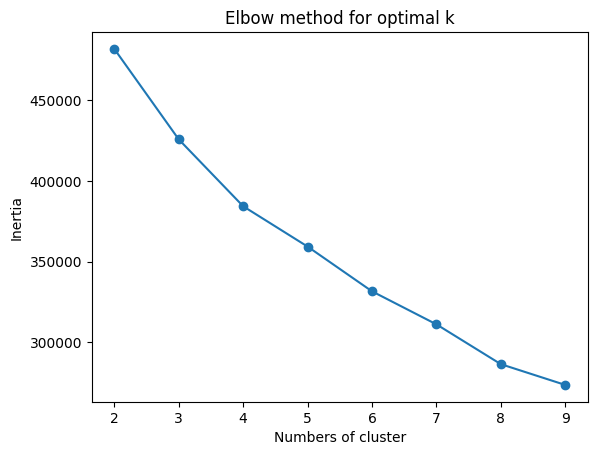

In [148]:
### IMPORT LIBRARY FOR CLUSTERS
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score

### KMEANS
k_values=range(2,10)
inertia=[]
for k in k_values:
  model=KMeans(n_clusters=k,random_state=42)
  kmeans_labels=model.fit_predict(X_train)
  sil_score=silhouette_score(X_train,kmeans_labels)
  inertia.append(model.inertia_)
  print(f"{k}clusters={model.inertia_}")
  print(f"{k}Silhouette Score:{sil_score}")

### KMEANS EDA
plt.plot(k_values,inertia,marker='o')
plt.title("Elbow method for optimal k")
plt.xlabel("Numbers of cluster")
plt.ylabel("Inertia")
plt.show()


DBSCAN

In [149]:
## DBSCAN
for epss in [1.0,1.5,2.0]:
  dbscan=DBSCAN(epss,min_samples=26)
  dbscan_labels=dbscan.fit_predict(X_train)
  unique_clusters=set(dbscan_labels)
  print("unique_clusters",unique_clusters)

  if len(unique_clusters)>1:
    sil_score=silhouette_score(X_train,dbscan_labels)
    print(f"Silhouette Score:{sil_score}")
  else:
    print("No clusters found")


unique_clusters {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70),

HIERARCHICAL CLUSTERING

In [150]:
### HIERARCHICAL CLUSTERING
subset=X_train.iloc[np.random.choice(X_train.shape[0],size=5000,replace=False)]
hier=AgglomerativeClustering(n_clusters=5,linkage='ward')
hier_labels=hier.fit_predict(subset)
hier_sil_score=silhouette_score(subset,hier_labels)
print('Silhouette Score:',hier_sil_score)


Silhouette Score: 0.1153269124108302


PCA

In [151]:
### PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_train)

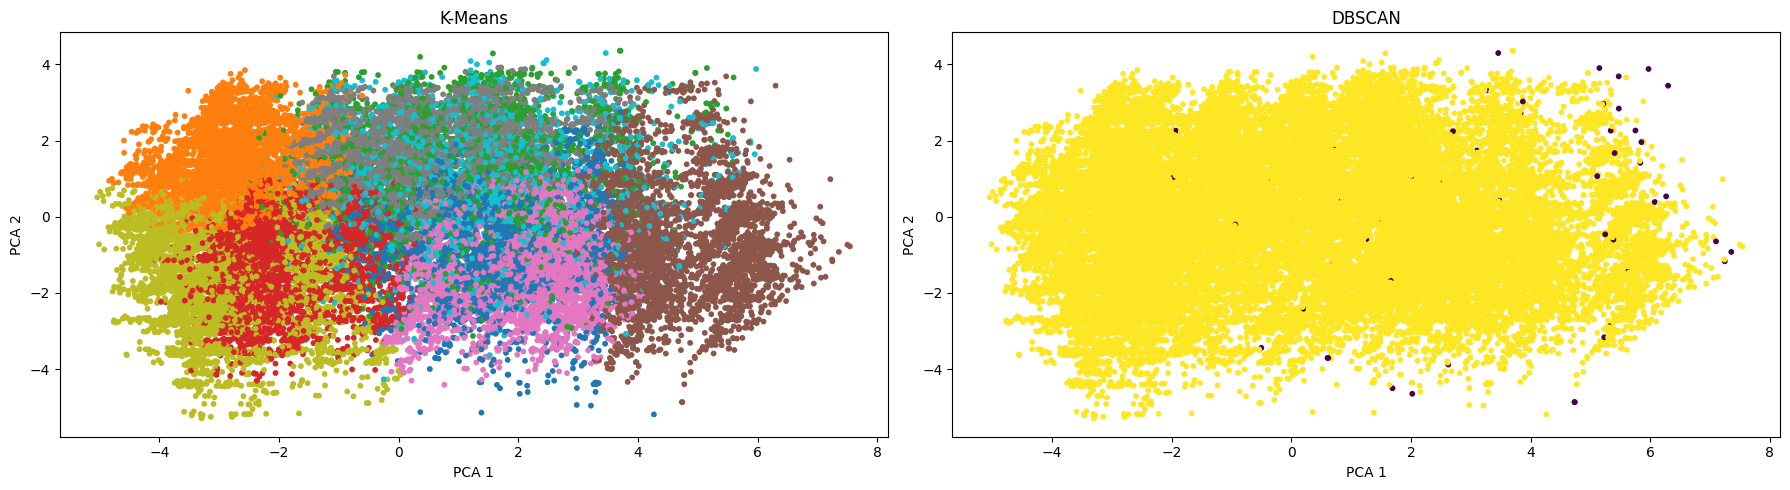

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='tab10', s=10)
axes[0].set_title('K-Means')

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='viridis', s=10)
axes[1].set_title('DBSCAN')

for ax in axes:
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


BEST MODEL FOR CLUSTERING

In [153]:
### KMEANS BEST MODEL
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans_labels=kmeans.fit_predict(X_train)

inertia=kmeans.inertia_
sil_score=silhouette_score(X_train,kmeans_labels)
print("K-Means Clustering Results")
print(f"Inertia:{inertia}")
print(f"Silhouette Score:{sil_score}")

K-Means Clustering Results
Inertia:482010.4813932315
Silhouette Score:0.27355692452672936


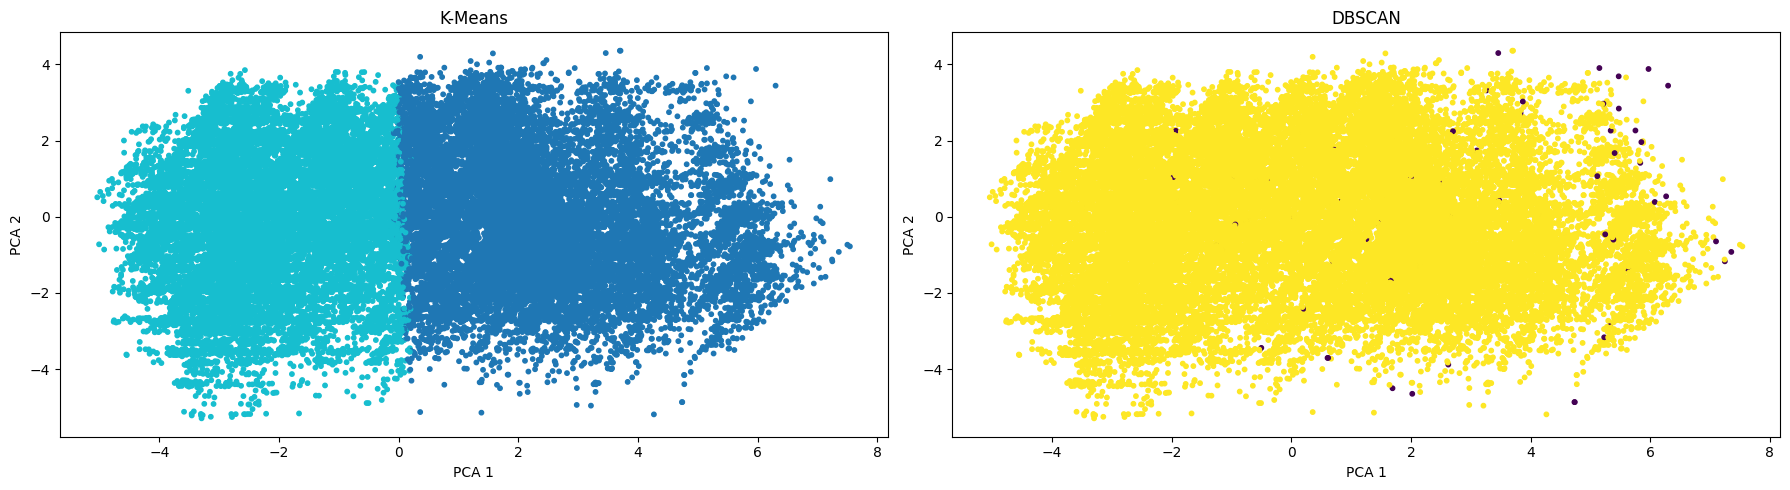

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='tab10', s=10)
axes[0].set_title('K-Means')

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='viridis', s=10)
axes[1].set_title('DBSCAN')

for ax in axes:
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


 KMEANS EDA

In [155]:
df_cluster=pd.DataFrame({
    'kmeans_labels':kmeans_labels,
    'price_inr':y_train.values,
    'carat':X_train['carat'],
    'cut':X_train['cut']
    })

In [156]:
df_cluster.groupby('kmeans_labels')[['price_inr','carat']].mean()

,price_inr,carat
kmeans_labels,,
0,13.098602,0.866926
1,11.444881,-0.827360


In [157]:
df_cluster.groupby('kmeans_labels')['cut'].value_counts()

kmeans_labels  cut
0              3.0     6326
               4.0     6113
               2.0     5157
               1.0     2377
               0.0     1042
1              4.0    11019
               3.0     4758
               2.0     4496
               1.0     1521
               0.0      226
Name: count, dtype: int64

In [158]:
## save clustering model
with open('diamond_cluster_model.pkl','wb')as f:
  pickle.dump(kmeans,f)

REGRESSION MODEL BUILDING -PRICE PREDICTION

In [159]:
### DEFINE ALL MODELS
models={
    'lr':LinearRegression(),
    'dt':DecisionTreeRegressor(),
    'rf':RandomForestRegressor(),
    'knn':KNeighborsRegressor(),
    'xg':XGBRegressor()
     }
### LOOP THROUGH EACH MODEL
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=mse**0.5
    r2=r2_score(y_test,y_pred)
    print(name,"Result")
    print(f"MAE:{mae}")
    print(f"MSE:{mse}")
    print(f"RMSE:{rmse}")
    print(f"R2 SCORE:{r2}")
    print("")

lr Result
MAE:0.023176924218701777
MSE:0.0024120579899050525
RMSE:0.04911270701055942
R2 SCORE:0.9974754527145131

dt Result
MAE:0.005659552357010555
MSE:0.0005529887360633464
RMSE:0.02351571253573547
R2 SCORE:0.9994212219530474

rf Result
MAE:0.0036035831314309976
MSE:0.00020392058606442153
RMSE:0.014280076542666763
R2 SCORE:0.9997865693262109

knn Result
MAE:0.06511401094235468
MSE:0.008376867721051486
RMSE:0.09152522996994591
R2 SCORE:0.9912324667339794

xg Result
MAE:0.008625419119225063
MSE:0.00021894106507307665
RMSE:0.014796657226315566
R2 SCORE:0.9997708483486611



ANN REGRESSION MODEL BUILDING

In [160]:
### IMPORT LIBRARY FOR ANN
import torch
import torch.nn as nn
import torch.optim as optim

In [161]:
### TARGET SCALER
scaler_y=StandardScaler()
y_train=scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test=scaler_y.transform(y_test.values.reshape(-1,1))

In [162]:
### TENSOR CONVERSION
X_train=torch.tensor(X_train.values,dtype=torch.float32)
X_test=torch.tensor(X_test.values,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32).view(-1,1)
y_test=torch.tensor(y_test,dtype=torch.float32).view(-1,1)

In [163]:
### ANN CLASS FUNCTION
class diamondANN(nn.Module):
  def __init__(self,input_dim):
    super().__init__()
    self.net=nn.Sequential(
      nn.Linear(input_dim,64),
      nn.ReLU(),
      nn.Linear(64,32),
      nn.ReLU(),
      nn.Linear(32,1)
    )

  def forward(self,x):
    return self.net(x)

In [164]:
### MODEL TRAINING
model=diamondANN(X_train.shape[1])
loss_function=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
print(model)
print(loss_function)
print(optimizer)

diamondANN(
  (net): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)
MSELoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [165]:
epochs=50
for epoch in range(epochs):
  optimizer.zero_grad()
  y_pred=model(X_train)
  loss=loss_function(y_pred,y_train)
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch+1}/{epochs},loss:{loss.item()}")

Epoch 1/50,loss:1.5657998323440552
Epoch 2/50,loss:1.4686692953109741
Epoch 3/50,loss:1.377052664756775
Epoch 4/50,loss:1.2907366752624512
Epoch 5/50,loss:1.2095448970794678
Epoch 6/50,loss:1.1331478357315063
Epoch 7/50,loss:1.061083436012268
Epoch 8/50,loss:0.9927647709846497
Epoch 9/50,loss:0.9276766180992126
Epoch 10/50,loss:0.8654041290283203
Epoch 11/50,loss:0.8057156205177307
Epoch 12/50,loss:0.7484901547431946
Epoch 13/50,loss:0.6936328411102295
Epoch 14/50,loss:0.641021728515625
Epoch 15/50,loss:0.5904561877250671
Epoch 16/50,loss:0.5417444109916687
Epoch 17/50,loss:0.4947732388973236
Epoch 18/50,loss:0.4495339095592499
Epoch 19/50,loss:0.40598830580711365
Epoch 20/50,loss:0.3641359210014343
Epoch 21/50,loss:0.3240666091442108
Epoch 22/50,loss:0.2859480381011963
Epoch 23/50,loss:0.24999861419200897
Epoch 24/50,loss:0.2164616584777832
Epoch 25/50,loss:0.18560972809791565
Epoch 26/50,loss:0.15769296884536743
Epoch 27/50,loss:0.1329309493303299
Epoch 28/50,loss:0.11151732504367828

In [166]:
### MODEL EVALUATION
with torch.no_grad():
  y_test_pred=model(X_test)
  test_loss=loss_function(y_test_pred,y_test)
  print("Test Evaluation Results")
  print(f'test loss:{test_loss.item()}')
  print(f"MAE:{mae}")
  print(f"MSE:{mse}")
  print(f"RMSE:{rmse}")
  print(f"R2 SCORE:{r2}")



Test Evaluation Results
test loss:0.018206551671028137
MAE:0.008625419119225063
MSE:0.00021894106507307665
RMSE:0.014796657226315566
R2 SCORE:0.9997708483486611
